<h1>MNIST Classification with multi-layer perceptron using Tensorflow </h1>

In [0]:
#!cat /proc/cpuinfo
#!cat /proc/meminfo

In [0]:
import tensorflow as tf

In [0]:
import warnings
warnings.filterwarnings('ignore')


In [0]:
#import tensorflow_datasets as tfds
#mnist_train = tfds.load(name="mnist", split="train")
#assert isinstance(mnist_train, tf.data.Dataset)
#print(mnist_train)

In [0]:
# Tensor refer to high dimensional matrix

In [47]:
tf.__version__


'1.14.0'

In [48]:
# Import MINST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [49]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [50]:
type(mnist.train.images[0])

numpy.ndarray

In [51]:
print("Number of training samples is:",mnist.train.num_examples)
print("Number of test samples is:",mnist.test.num_examples)


Number of training samples is: 55000
Number of test samples is: 10000


<h3> Understanding Input and Output </h3>

In [52]:
mnist.train.images[0].shape

(784,)

So input is basically a 784 dimension vector which is essentially a 28 x 28 matrix of image flattened. To visualise the image we reshape it to 28 x 28 and observe it using matplotlib

In [0]:
sample =mnist.train.images[0].reshape(28,28)

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

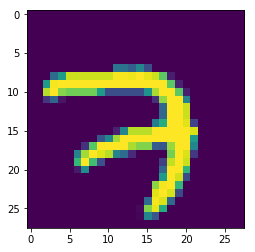

In [55]:
plt.imshow(sample)

In [56]:
mnist.train.labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

Output is a one hot vector with 1 at position 8 and all other elements zero, which essentially indicates that the image represents number 8

The entire purpose of TensorFlow is to have a so-called computational graph that can be executed much more efficiently than if the same calculations were to be performed directly in Python. TensorFlow can be more efficient than NumPy because TensorFlow knows the entire computation graph that must be executed, while NumPy only knows the computation of a single mathematical operation at a time.


So what does computation graph mean? It is graph with nodes being computation units(add,subtract, etc) and edges being flow of Tensors (multidimensional arrays). 
A TensorFlow graph consists of the following parts:

* Placeholder variables used to feed input into the graph.
* Model variables that are going to be optimized so as to make the model perform better.
* The model which is essentially just a mathematical function that calculates some output given the input in the placeholder variables and the model variables.
* A cost measure that can be used to guide the optimization of the variables.
* An optimization method which updates the variables of the model.

Tensorflow approaches series of computations(mathematical operations) as a flow of data through this graph. Tensorflow builds the computation graph before it starts execution, so the computations are scheduled only when it is absolutely necessary (lazy programming). The graph is not actually executed when the nodes are defined. After the graph is assembled, it is deployed and executed in a Session, which is a run-time environment that binds the hardware it is going to run in.

References:
deepnotes.io ,
www.hvass-labs.org

<h3>Placeholder Variable</h3>

These are the input variables to graph

In [0]:
n_input = 784 # MNIST data input (img shape: 28*28)
n_classes = 10 # MNIST total classes (0-9 digits)


In [0]:
#Setting up placeholder variables for inputs

#Placeholder variable for input image, each entry of datatype float, and shape is [None, n_input]. None implies it can hold
#arbitrary number of images and each image is a vector of length n_input 
x = tf.placeholder("float" , [None, n_input])

#Placeholder variable for true label of input image, each entry of datatype float, and shape is [None, n_classes]. None implies it can hold
#arbitrary number of labels and each label is a vector of length n_label i.e 10  

y = tf.placeholder("float" , [None, n_classes])

<h3> Variables to be Optimized </h3>

These are the model variables, which must be changed by TensorFlow using some optimization technique so that model will perform better

In [0]:
n_hidden_1 = 256 # 1st layer number of features
n_hidden_2 = 256 # 2nd layer number of features
n_samples = mnist.train.num_examples

In [0]:
weights={
    
    'w1' : tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'w2' : tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out' : tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
    
}

In [0]:
biases = {
    
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes])),
}

<h3> Model </h3>

Our approximation of the true relation between input and output.Here we use MultilayerPerceptron as our model

In [0]:
def MultilayerPerceptron(x, weights, biases):
  
  
  #First hidden layer with ReLU activation function
  layer_1 = tf.add(tf.matmul(x,weights['w1']) , biases['b1'] )
  layer_1 = tf.nn.relu(layer_1)
  
  layer_2 = tf.add(tf.matmul(layer_1,weights['w2']), biases['b2'])
  layer_2 = tf.nn.relu(layer_2)
  
  # Last Output layer with linear activation
  out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
  return out_layer
  

<h4>Setting Hyper Parameters</h4>

In [0]:
learning_rate = 0.01 # for update rule in optimization algorithm
training_epochs = 20 
batch_size = 100 # number of sample to work through before computing gradient

<h4>Neural Network Configuration</h4>

<h3>Loss/Cost function</h3>

The cost function gives an idea of how far the predicted output of our model is from the actual value. Since this is a classification problem we use cross entopy as the loss function

In [0]:
pred = MultilayerPerceptron(x,weights, biases)

In [0]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred,labels=y))


<h3> Optimization Algorithm </h3>

The optimization algorithm modifies the weights and biases such that the loss(i.e cross entropy b/w predicted and true distribution) is minimum. Here we use the Adam optimizer

In [0]:
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)

<h3> Performance Metrics </h3>

<h2> Running TensorFlow </h2>

<h3> Creating TensorFlow Session </h3>

TensorFlow session is used to execute the computational graph

In [0]:
sess = tf.Session()

<h3>Initialise variables </h3>

In [0]:
init = tf.initialize_all_variables()
sess.run(init)


In [0]:
Xsamp, ysamp = mnist.train.next_batch(5)

In [89]:

sess = tf.InteractiveSession()


for epoch in range(training_epochs):
  
  avg_cost = 0
  
  total_batch = int(n_samples/batch_size)
  
  for i in range(total_batch):
    # Get a batch of training examples.
    # x_batch now holds a batch of images and
    # y_true_batch are the true labels for those images.
        
    batch_x, batch_y = mnist.train.next_batch(batch_size)
    
    # Run the optimizer using this batch of training data
    _,c = sess.run([optimizer,cost], feed_dict={x:batch_x , y:batch_y})
    
    avg_cost += c/total_batch
    
  print("Epoch: {} cost={:.4f}".format(epoch+1,avg_cost))


print("Model has completed {} Epochs of Training".format(training_epochs))

Epoch: 1 cost=43.3896
Epoch: 2 cost=8.5403
Epoch: 3 cost=4.4967
Epoch: 4 cost=3.0836
Epoch: 5 cost=2.5324
Epoch: 6 cost=2.1901
Epoch: 7 cost=2.2042
Epoch: 8 cost=1.9710
Epoch: 9 cost=1.6569
Epoch: 10 cost=1.3253
Epoch: 11 cost=1.1333
Epoch: 12 cost=1.0775
Epoch: 13 cost=0.9647
Epoch: 14 cost=1.0125
Epoch: 15 cost=0.6932
Epoch: 16 cost=0.6064
Epoch: 17 cost=0.7857
Epoch: 18 cost=0.5471
Epoch: 19 cost=0.5239
Epoch: 20 cost=0.4459
Model has completed 20 Epochs of Training


Compute Model Accuracy on Test Data

In [0]:
correct_predictions = tf.equal(tf.argmax(pred,1), tf.argmax(y,1))

In [0]:
correct_predictions = tf.cast(correct_predictions,'float')

In [92]:
print(correct_predictions[0])

Tensor("strided_slice_1:0", shape=(), dtype=float32)


In [0]:
accuracy = tf.reduce_mean(correct_predictions)

In [94]:
type(accuracy)

tensorflow.python.framework.ops.Tensor

In [96]:
print("Accuracy:", sess.run(accuracy,{x: mnist.test.images, y: mnist.test.labels}))

Accuracy: 0.9622
